In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error



import numpy as np
import pandas as pd

import datetime

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2018, 1, 1)
start_date_str = str(start.date())
end_date_str = str(end.date())


sliding_window_size = 50

"""
stocks = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 'GE',
          'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE',
          'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT', 'GOOGL', 'AMZN', 'AABA']

for ticker in stocks:
    file_name = 'data/' + ticker + '_' + start_date_str + '_to_' + end_date_str + '.csv'
    print(file_name)
    frame = pd.read_csv(file_name)
    print(frame)
"""
stocks = ['AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'IBM']#, 'GOOGL', 'AMZN', 'AABA']

#stock = 'GOOGL'
frames = []
data_x = np.empty([sliding_window_size])
data_y = np.empty([1])
print(data_x, data_y)

print(data_x.shape)
print(data_y.shape)


for stock in stocks:
    file_name = 'data/' + stock + '_' + start_date_str + '_to_' + end_date_str + '.csv'
    print(file_name)
    frame = pd.read_csv(file_name)
    
    frame = frame['Close']
    
    frame =(frame.values).reshape(-1,1)
    data = (normalize(frame, axis=0)).squeeze()
    print(data.size)
    
    
    for i in range(data.size - sliding_window_size - 1):
        data_sample_x = data[i:i+sliding_window_size]

        #EITHER EXACT PRICE OR INCREASE/DECREASE FORMAT
        #data_sample_y = data[i+sliding_window_size]
        data_sample_y = 1 if data[i+sliding_window_size] > data[i+sliding_window_size - 1] else 0
        data_x = np.vstack([data_x , data_sample_x])
        data_y = np.vstack([data_y , data_sample_y])

    print(data_x.shape)
    print(data_y.shape)
data_x = data_x[1:]
data_y = data_y[1:]








[6.67019254e-317 9.31688261e-312 1.99455100e-312 0.00000000e+000
 1.69484279e-319 1.99455100e-312 0.00000000e+000 9.31676919e-312
 0.00000000e+000 0.00000000e+000 0.00000000e+000 9.31689158e-312
 2.96439388e-323 6.95237638e-310 2.02369289e-320 2.96439388e-323
 6.95237639e-310 9.88131292e-324 0.00000000e+000 0.00000000e+000
 8.49951012e-319 0.00000000e+000             nan 0.00000000e+000
 4.67296746e-307 1.69121096e-306 8.90098127e-307 1.15710699e-306
 7.56599807e-307 8.90104239e-307 9.34593493e-307 6.23059726e-307
 1.42410839e-306 1.60220393e-306 1.24610383e-306 1.69118108e-306
 8.06632139e-308 1.20160711e-306 1.69119330e-306 1.11260416e-306
 1.69118108e-306 1.11261570e-306 6.89804132e-307 1.37962320e-306
 8.34447260e-308 1.39071445e-307 1.33511562e-306 8.90103560e-307
 1.42410974e-306 3.23796840e-317] [1.]
(50,)
(1,)
data/AAPL_2006-01-01_to_2018-01-01.csv
3019
[[6.67019254e-317 9.31688261e-312 1.99455100e-312 ... 8.90103560e-307
  1.42410974e-306 3.23796840e-317]
 [2.47573342e-003 2.4

In [2]:
data_x_train = data_x[:10000]
data_y_train = data_y[:10000]

data_x_test = data_x[10000:]
data_y_test = data_y[10000:]

In [3]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable

In [4]:
X_train_tensors = Variable(torch.Tensor(data_x_train))
X_test_tensors = Variable(torch.Tensor(data_x_test))

y_train_tensors = Variable(torch.Tensor(data_y_train))
y_test_tensors = Variable(torch.Tensor(data_y_test)) 


print(X_train_tensors.shape)
print(y_train_tensors.shape)
print(X_test_tensors.shape)
print(y_test_tensors.shape)

torch.Size([10000, 50])
torch.Size([10000, 1])
torch.Size([7812, 50])
torch.Size([7812, 1])


In [5]:
print(X_train_tensors)

tensor([[0.0025, 0.0025, 0.0025,  ..., 0.0022, 0.0022, 0.0022],
        [0.0025, 0.0025, 0.0025,  ..., 0.0022, 0.0022, 0.0021],
        [0.0025, 0.0025, 0.0025,  ..., 0.0022, 0.0021, 0.0021],
        ...,
        [0.0151, 0.0145, 0.0145,  ..., 0.0138, 0.0138, 0.0138],
        [0.0145, 0.0145, 0.0150,  ..., 0.0138, 0.0138, 0.0135],
        [0.0145, 0.0150, 0.0150,  ..., 0.0138, 0.0135, 0.0136]])


In [6]:
#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

In [7]:
print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 
print(y_train_tensors)

Training Shape torch.Size([10000, 1, 50]) torch.Size([10000, 1])
Testing Shape torch.Size([7812, 1, 50]) torch.Size([7812, 1])
tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [1.]])


In [8]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc_2 =  nn.Linear(128, 64) #fully connected 2
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        #print(hn.shape)
        #is layers > 1, get only last element
        hn = hn[-1]
        #print(hn.shape)
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        #print(hn.shape)
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        #out = self.fc_2(out) #2nd Dense
        #out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [9]:
num_epochs = 1000 
learning_rate = 0.001 #0.001 lr

input_size = 50 #number of features
hidden_size = 10 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 


for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad()
 
    loss = criterion(outputs, y_train_tensors)
 
    loss.backward() #calculates the loss of the loss function
 
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss)) 






Epoch: 0, loss: 0.67334
Epoch: 100, loss: 0.24967
Epoch: 200, loss: 0.24964
Epoch: 300, loss: 0.24964
Epoch: 400, loss: 0.24964
Epoch: 500, loss: 0.24964
Epoch: 600, loss: 0.24964
Epoch: 700, loss: 0.24964
Epoch: 800, loss: 0.24964
Epoch: 900, loss: 0.24964


In [10]:
#testing


with torch.no_grad():
    print(X_test_tensors_final.shape, y_test_tensors.shape)
    output = torch.round(lstm1.forward(X_test_tensors_final))
    acc = torch.eq(output, y_test_tensors)
    print(sum(acc)/ y_test_tensors.shape[0])
    print("loss: %1.5f" % (criterion(output, y_test_tensors)))
    print(output.shape, y_test_tensors.shape)


torch.Size([7812, 1, 50]) torch.Size([7812, 1])
tensor([0.5092])
loss: 0.49078
torch.Size([7812, 1]) torch.Size([7812, 1])


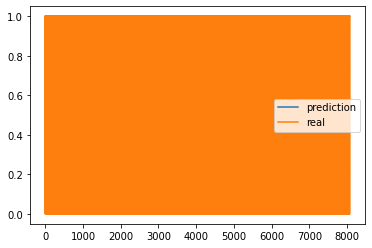

In [16]:
plt.plot(output, label='prediction')
plt.plot(y_test_tensors, label='real')
plt.legend()
plt.show()

In [47]:
#generative mode
"""
X_new = X_test_tensors_final[0:1]
y_test_tensors
print(X_new.shape, X_test_tensors_final.shape, y_test_tensors.shape)
output = []
with torch.no_grad():
    for i in range(100):
        
        out = lstm1.forward(X_new)
        output.append(out)
        
        X_new = X_new[:, :, 1:50]

        X_new = torch.cat((X_new, out.unsqueeze(1)), dim=2)

    
"""

'\nX_new = X_test_tensors_final[0:1]\ny_test_tensors\nprint(X_new.shape, X_test_tensors_final.shape, y_test_tensors.shape)\noutput = []\nwith torch.no_grad():\n    for i in range(100):\n        \n        out = lstm1.forward(X_new)\n        output.append(out)\n        \n        X_new = X_new[:, :, 1:50]\n\n        X_new = torch.cat((X_new, out.unsqueeze(1)), dim=2)\n\n    \n'

In [ ]:
# ADD measurment of profit, like if price n > price n-1 and model predicts that then good

#OR EVEN BETTER   calculate % change and if its + or -      FOR BOTH BUY AND SHORT

In [39]:
good = 0
bad = 0
last_pred = 0
last_true = 0
for pred_y, real_y in zip(output, y_test_tensors):
    if pred_y > last_pred and real_y > last_true:
        good+=1
    elif pred_y > last_pred and real_y < last_true:
        bad+=1
    elif pred_y < last_pred and real_y < last_true:
        good+=1
    elif pred_y < last_pred and real_y > last_true:
        bad+=1
    last_pred = pred_y
    last_true = real_y
print(good, bad, output.shape)

1042 1053 torch.Size([2124, 1])
